<a href="https://colab.research.google.com/github/MLopita/Online_Shopping_Analysis/blob/main/Online_shopping_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")


In [2]:
import pandas as pd

customers = pd.read_csv('customers.csv', encoding='latin1')
orders = pd.read_csv('orders.csv', encoding='latin1')
order_items = pd.read_csv('order_items.csv', encoding='latin1')
payments = pd.read_csv('payments.csv', encoding='latin1')
sellers = pd.read_csv('sellers.csv', encoding='latin1')
geolocation = pd.read_csv('geolocation.csv', encoding='latin1')
products = pd.read_csv('products.csv', encoding='latin1')



In [3]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')


**Unique cities where customers are located**

In [35]:
Count_Of_Unique_Cities= customers['customer_city'].nunique()
print("Count_Of_Unique_Cities:" ,Count_Of_Unique_Cities)
unique_cities = sorted(customers['customer_city'].dropna().unique())
for city in unique_cities:
    print(city)

Count_Of_Unique_Cities: 4119
abadia dos dourados
abadiania
abaete
abaetetuba
abaiara
abaira
abare
abatia
abdon batista
abelardo luz
abrantes
abre campo
abreu e lima
acaiaca
acailandia
acajutiba
acarau
acari
acegua
acopiara
acreuna
acu
acucena
adamantina
adhemar de barros
adolfo
adrianopolis
adustina
afogados da ingazeira
afonso claudio
afranio
agisse
agrestina
agrolandia
agronomica
agua boa
agua branca
agua clara
agua comprida
agua doce
agua doce do norte
agua fria de goias
agua limpa
agua nova
agua preta
agua santa
aguai
aguas belas
aguas claras
aguas da prata
aguas de lindoia
aguas de santa barbara
aguas de sao pedro
aguas formosas
aguas frias
aguas lindas de goias
aguas mornas
aguas vermelhas
agudo
agudos
aguia branca
aimores
aiuaba
aiuruoca
ajapi
ajuricaba
alagoa
alagoa grande
alagoa nova
alagoinha
alagoinhas
alambari
alcantara
alcinopolis
alcobaca
alegre
alegrete
alegrete do piaui
alegria
alem paraiba
alexandra
alexandria
alexandrita
alexania
alfenas
alfredo chaves
alfredo marcond

/tmp/ipython-input-1232127124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Customer_Count', y='City', data=top_cities, palette='viridis')


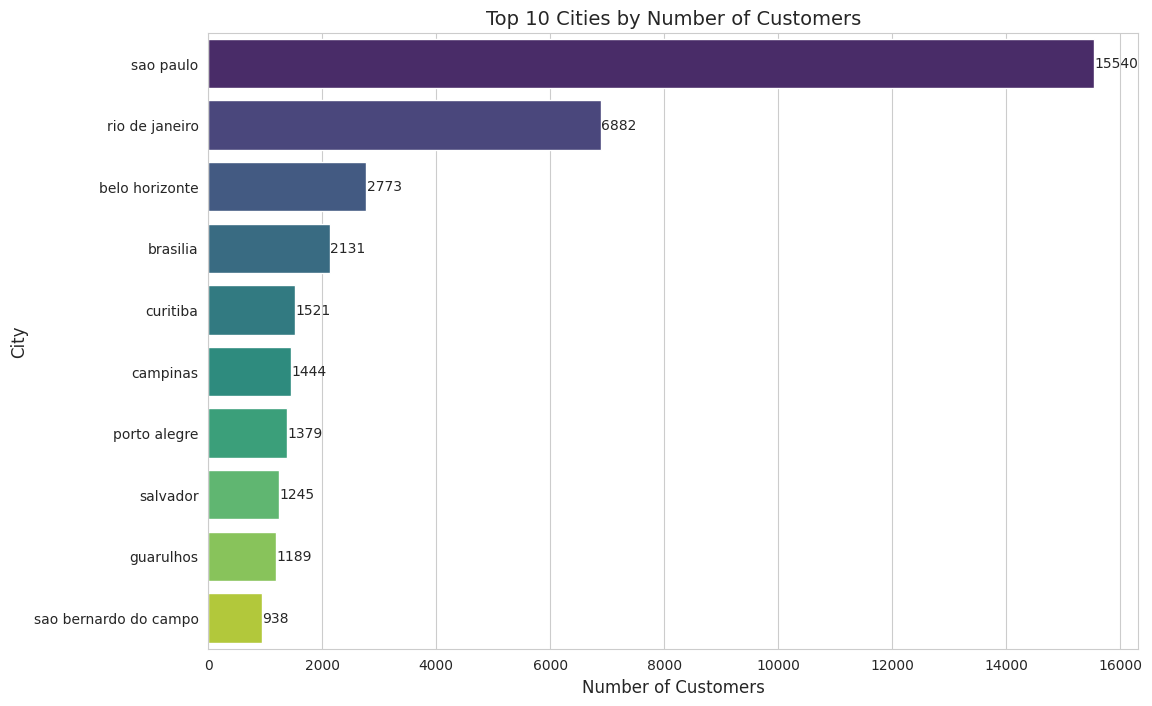

In [40]:
city_counts = customers['customer_city'].value_counts().reset_index()
city_counts.columns = ['City', 'Customer_Count']

top_cities = city_counts.head(10)
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Customer_Count', y='City', data=top_cities, palette='viridis')
plt.title('Top 10 Cities by Number of Customers', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('City', fontsize=12)

for i, (count, city) in enumerate(zip(top_cities['Customer_Count'], top_cities['City'])):
    ax.text(count + 10, i, f'{count}', va='center', fontsize=10)

plt.show()

**Number of orders placed in 2017**

In [6]:
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]
print("Orders in 2017:", orders_2017.shape[0])

Orders in 2017: 45101


/tmp/ipython-input-2171053445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month', y='orders', data=orders_per_month, palette='Blues_d')


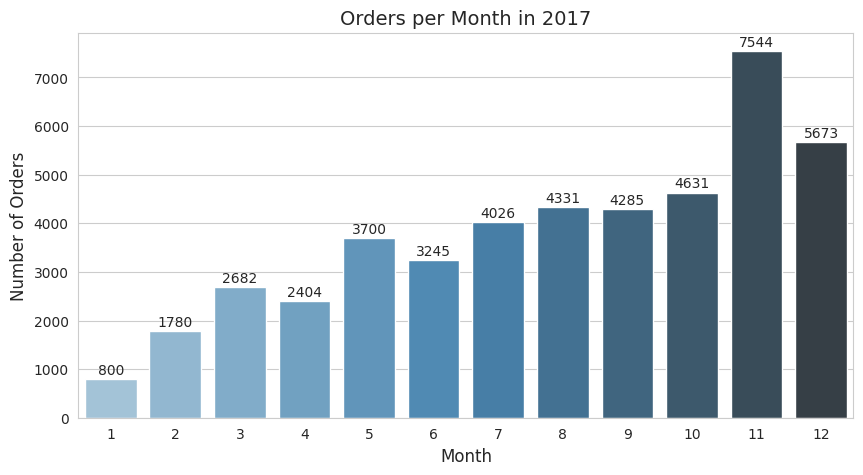

In [7]:
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]
orders_per_month = orders_2017.groupby(orders_2017['order_purchase_timestamp'].dt.month).size().reset_index(name='orders')
orders_per_month.rename(columns={'order_purchase_timestamp':'month'}, inplace=True)


plt.figure(figsize=(10,5))
ax = sns.barplot(x='month', y='orders', data=orders_per_month, palette='Blues_d')
plt.title('Orders per Month in 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

for i, row in orders_per_month.iterrows():
    ax.text(i, row['orders'] + 100, f"{row['orders']}", ha='center', fontsize=10)

plt.show()

**Total Sales per Product Category**

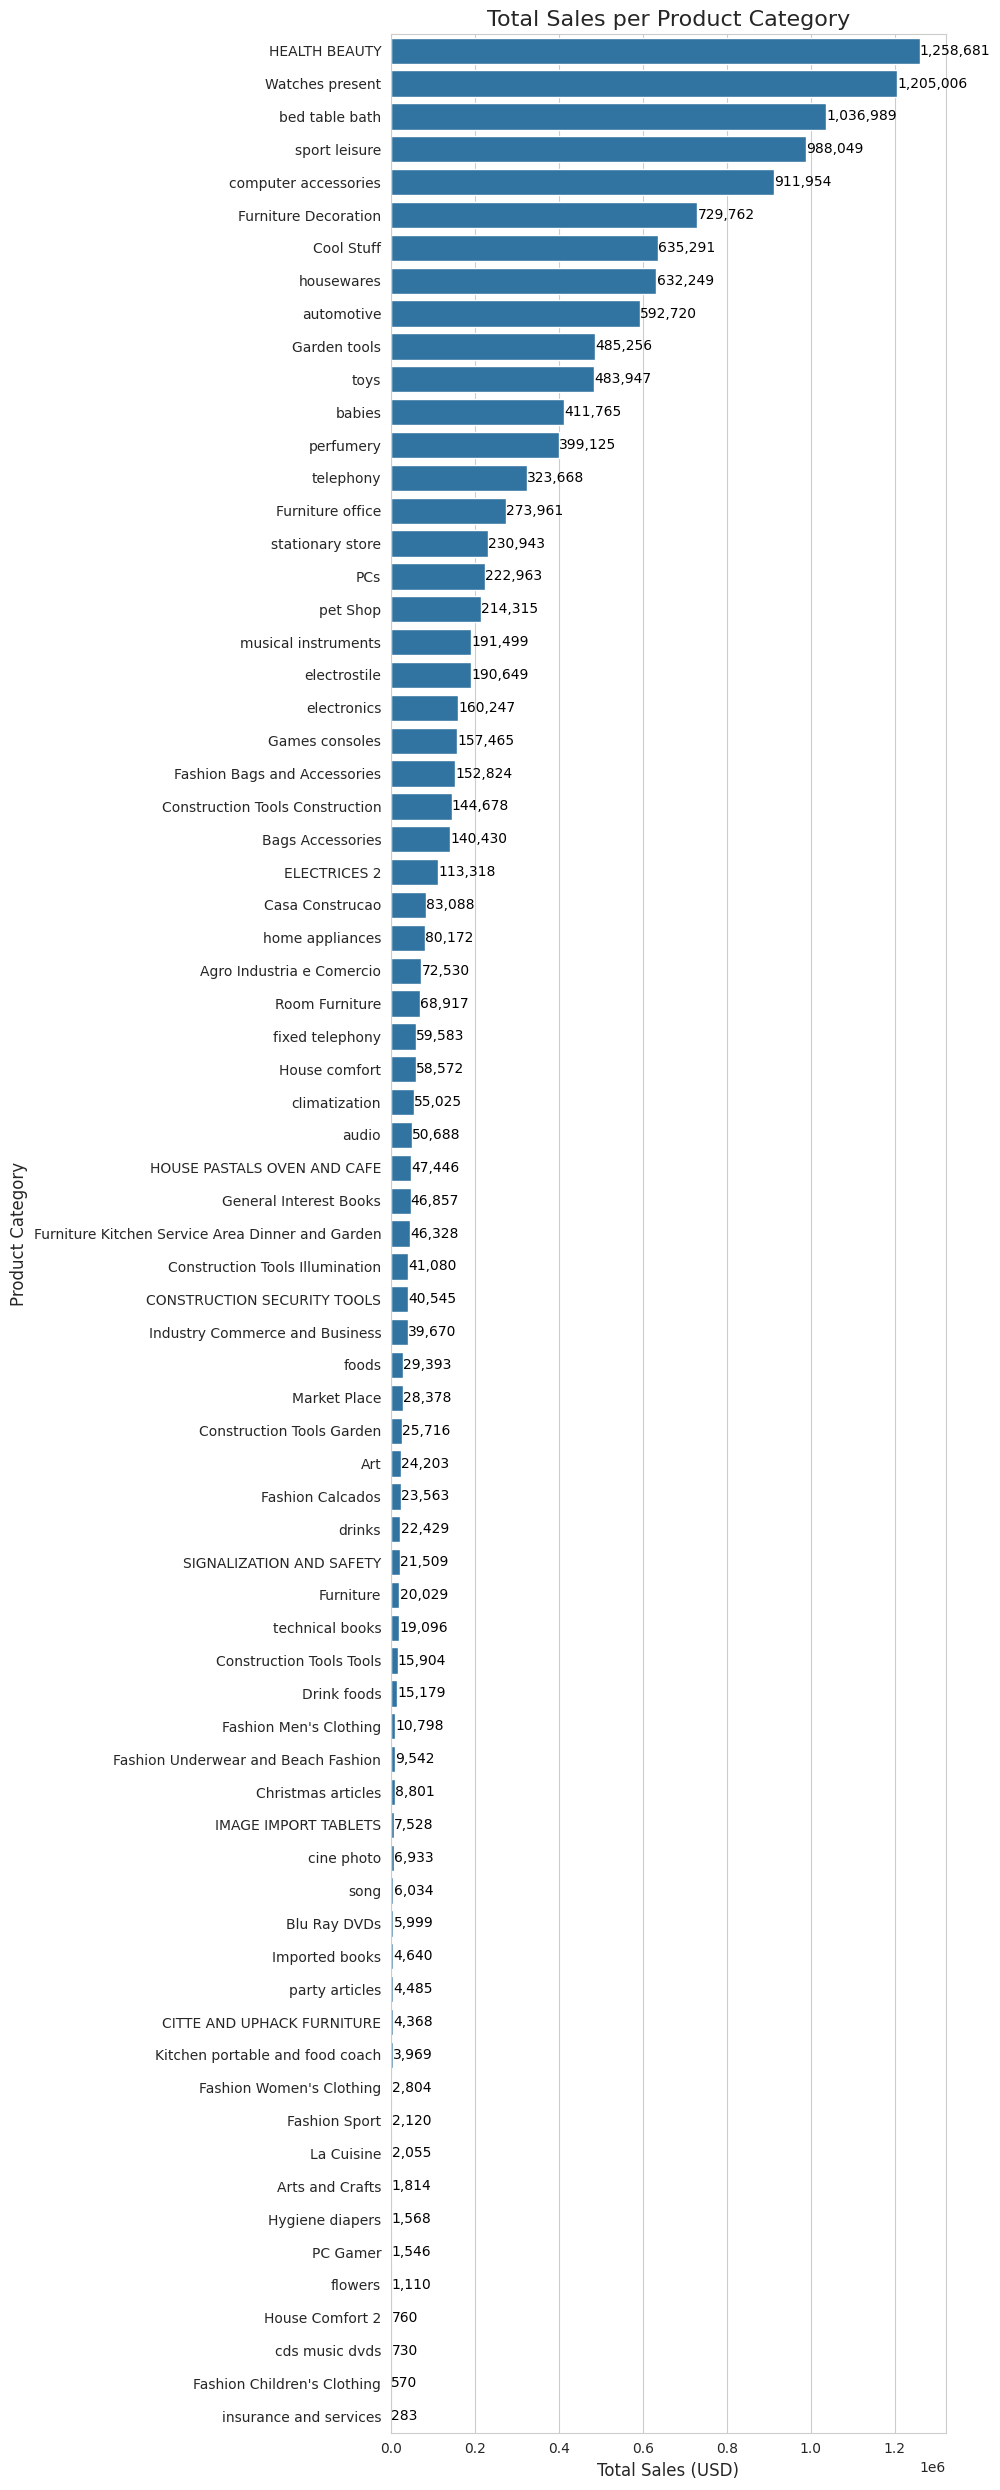

In [43]:
merged = order_items.merge(products, on='product_id', how='left')
sales_category = (
    merged.groupby('product category')['price']
    .sum()
    .reset_index()
    .sort_values(by='price', ascending=False))

plt.figure(figsize=(10, 25))
ax = sns.barplot(x='price', y='product category', data=sales_category, orient='h')
plt.title('Total Sales per Product Category', fontsize=16)
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

for i, v in enumerate(sales_category['price']):
    ax.text(v + 500, i, f'{v:,.0f}', color='black', va='center', fontsize=10)
plt.tight_layout()
plt.show()


**Percentage of orders that were paid in installments**

In [44]:
installment_percentage = round((payments['payment_installments'] > 1).sum() / len(payments) * 100, 2)
print("installment_percentage", installment_percentage)

installment_percentage 49.42


**Number of customers per state**

/tmp/ipython-input-3497105147.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Customer_Count', y='State', data=cust_per_state, palette='coolwarm')


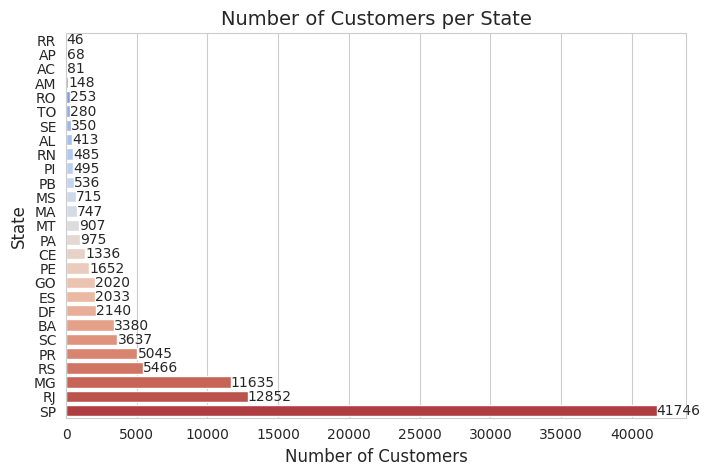

In [48]:
cust_per_state = customers['customer_state'].value_counts().reset_index()
cust_per_state.columns = ['State', 'Customer_Count']

cust_per_state = cust_per_state.sort_values(by='Customer_Count', ascending=True)


plt.figure(figsize=(8,5))
ax = sns.barplot(x='Customer_Count', y='State', data=cust_per_state, palette='coolwarm')
plt.title('Number of Customers per State', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('State', fontsize=12)


for i, (count, state) in enumerate(zip(cust_per_state['Customer_Count'], cust_per_state['State'])):
    ax.text(count + 5, i, f'{count}', va='center', fontsize=10)
plt.show()


**Number of orders per month in 2018**

In [11]:
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
print("Orders in 2018:", orders_2018.shape[0])

Orders in 2018: 54011


/tmp/ipython-input-2571948308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='Orders', data=orders_month, palette='Blues_d')


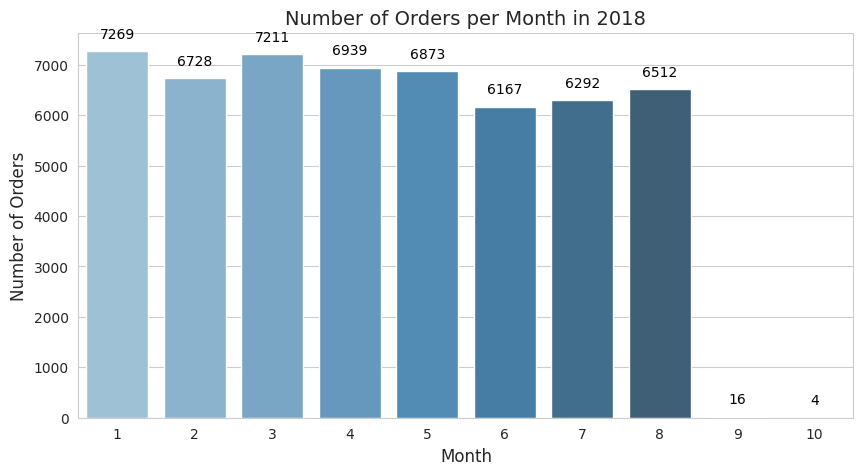

In [54]:
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
orders_month = (
    orders_2018.groupby(orders_2018['order_purchase_timestamp'].dt.month)
    .size()
    .reset_index(name='Orders'))
orders_month.columns = ['Month', 'Orders']

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Month', y='Orders', data=orders_month, palette='Blues_d')
plt.title('Number of Orders per Month in 2018', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

for i, value in enumerate(orders_month['Orders']):
    ax.text(i, value + 200, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

**Average number of products per order grouped by customer city**

/tmp/ipython-input-3321943597.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


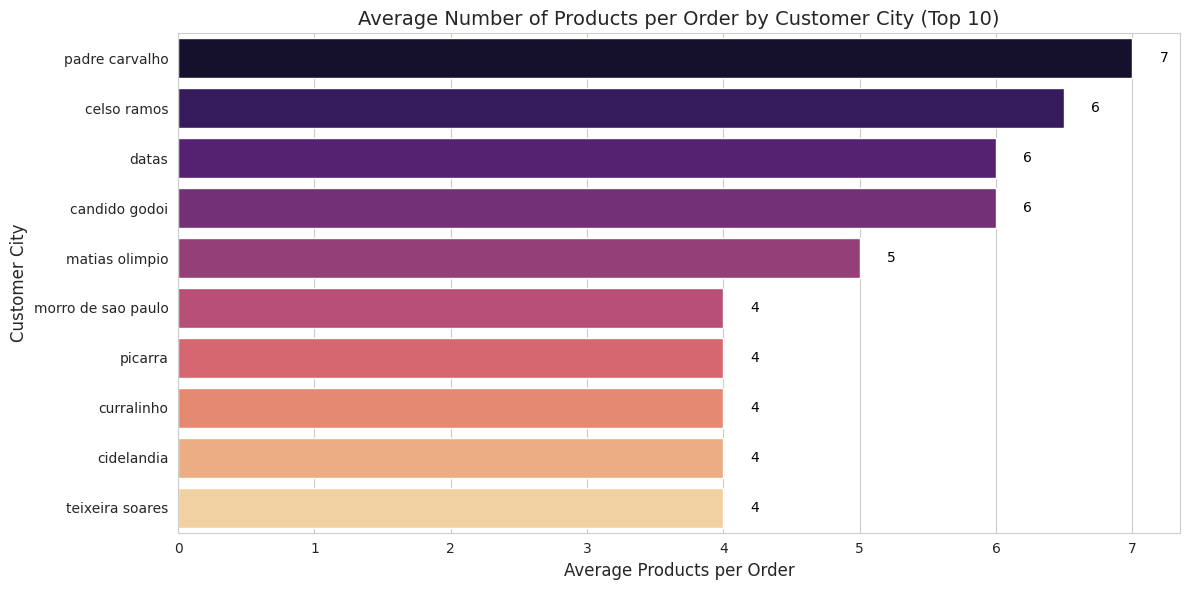

In [60]:
items_per_order = (
    order_items.groupby('order_id')['order_item_id']
    .count()
    .reset_index()
)
items_per_order.columns = ['order_id', 'items_count']

merged_data = (
    orders[['order_id', 'customer_id']]
    .merge(customers[['customer_id', 'customer_city']], on='customer_id', how='left')
    .merge(items_per_order, on='order_id', how='left')
)
avg_products_per_city = (
    merged_data.groupby('customer_city')['items_count']
    .mean()
    .reset_index()
)
avg_products_per_city.columns = ['City', 'Avg_Products_per_Order']
avg_products_per_city['Avg_Products_per_Order'] = avg_products_per_city['Avg_Products_per_Order'].round(0)

top_cities = avg_products_per_city.sort_values(by='Avg_Products_per_Order', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Avg_Products_per_Order',
    y='City',
    data=top_cities,
    palette='magma'
)

plt.title('Average Number of Products per Order by Customer City (Top 10)', fontsize=14)
plt.xlabel('Average Products per Order', fontsize=12)
plt.ylabel('Customer City', fontsize=12)

for i, value in enumerate(top_cities['Avg_Products_per_Order']):
    ax.text(value + 0.2, i, f"{int(value)}", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Percentage of total revenue by product category**

/tmp/ipython-input-3421676181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Revenue_Pct', y='product category', data=revenue_category, palette='viridis')


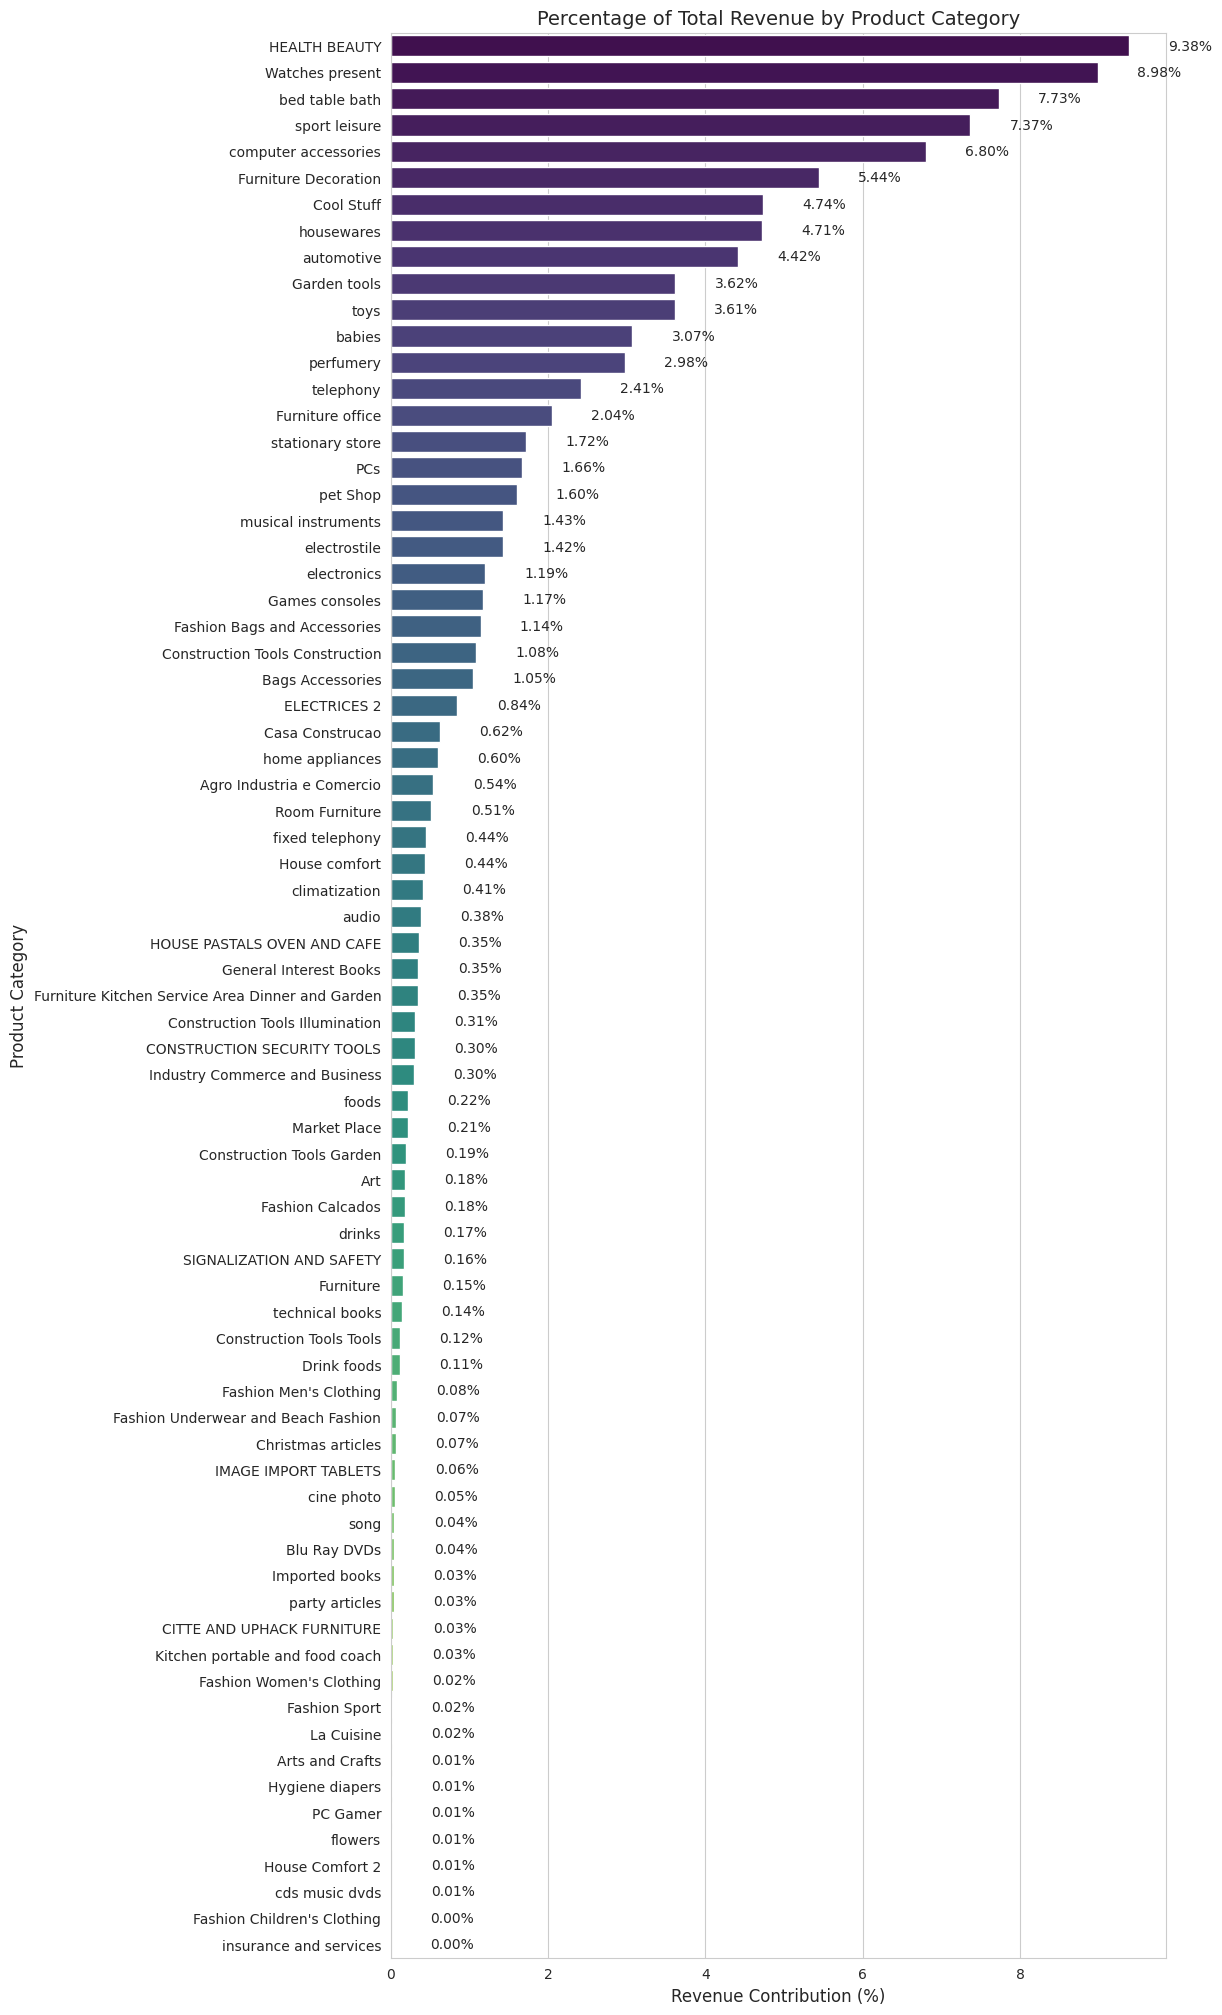

In [63]:
merged = order_items.merge(products, on='product_id', how='left')


revenue_category = merged.groupby('product category')['price'].sum().reset_index()
revenue_category['Revenue_Pct'] = 100 * revenue_category['price'] / revenue_category['price'].sum()
revenue_category = revenue_category.sort_values('Revenue_Pct', ascending=False)

plt.figure(figsize=(10,25))
ax = sns.barplot(x='Revenue_Pct', y='product category', data=revenue_category, palette='viridis')
plt.title('Percentage of Total Revenue by Product Category', fontsize=14)
plt.xlabel('Revenue Contribution (%)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

for i, row in enumerate(revenue_category['Revenue_Pct']):
    ax.text(row + 0.5, i, f"{row:.2f}%", va='center', fontsize=10)

plt.show()


**Correlation: product price vs times purchased**

In [15]:
product_sales = order_items.groupby('product_id').agg(
    avg_price=('price', 'mean'),
    times_purchased=('order_id', 'count')
).reset_index()

correlation = product_sales['avg_price'].corr(product_sales['times_purchased'])
correlation

np.float64(-0.032139862680945167)

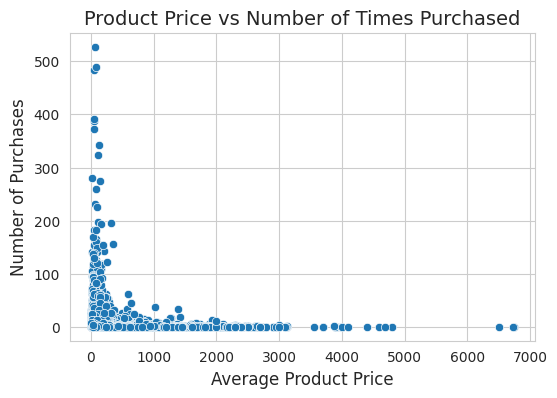

In [66]:
product_sales = order_items.groupby('product_id').agg({'price':'mean','order_item_id':'count'}).reset_index()
product_sales.columns = ['Product_ID','Avg_Price','Num_Purchased']

plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='Avg_Price', y='Num_Purchased', data=product_sales)
plt.title('Product Price vs Number of Times Purchased', fontsize=14)
plt.xlabel('Average Product Price', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

plt.show()


**Total revenue per seller & ranking**

/tmp/ipython-input-3188284171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price', y='seller_id', data=seller_revenue.head(10), palette='coolwarm')


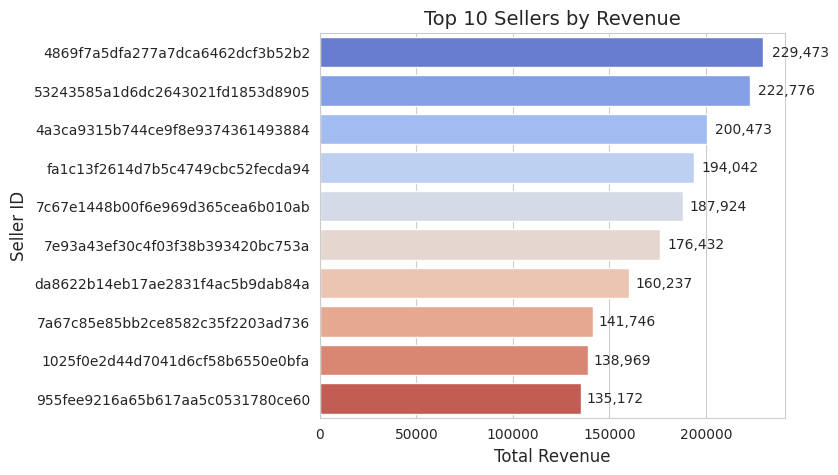

In [73]:
seller_revenue = order_items.groupby('seller_id')['price'].sum().reset_index()
seller_revenue = seller_revenue.sort_values('price', ascending=False)
plt.figure(figsize=(6,5))
ax = sns.barplot(x='price', y='seller_id', data=seller_revenue.head(10), palette='coolwarm')
plt.title('Top 10 Sellers by Revenue', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Seller ID', fontsize=12)

for i, row in enumerate(seller_revenue.head(10)['price']):
    ax.text(row + 0.02*row, i, f"{row:,.0f}", va='center', fontsize=10)

plt.show()


**Moving average of order values per customer**

In [18]:
order_totals = order_items.groupby('order_id')['price'].sum().reset_index()
orders_ma = orders[['order_id', 'customer_id', 'order_purchase_timestamp']].merge(order_totals, on='order_id', how='left')
orders_ma = orders_ma.sort_values(['customer_id', 'order_purchase_timestamp'])

orders_ma['moving_avg'] = orders_ma.groupby('customer_id')['price'].transform(lambda x: x.rolling(3, min_periods=1).mean())
orders_ma.head(5)


,order_id,customer_id,order_purchase_timestamp,price,moving_avg
68578,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,89.80,89.80
10013,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,54.90,54.90
65884,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,179.99,179.99
43174,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,149.90,149.90
5888,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,93.00,93.00


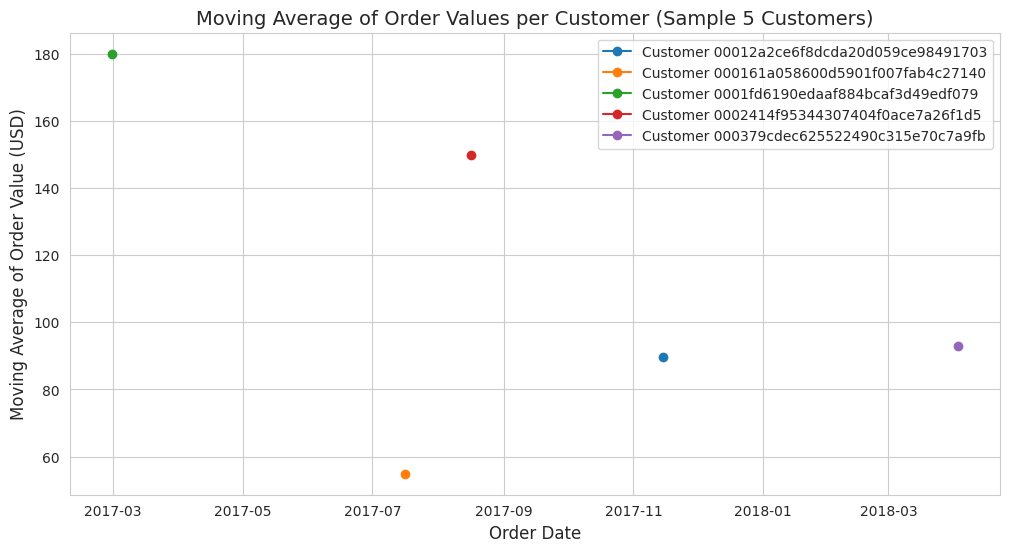

In [19]:
order_totals = order_items.groupby('order_id')['price'].sum().reset_index()
orders_ma = orders[['order_id','customer_id','order_purchase_timestamp']].merge(order_totals, on='order_id', how='left')
orders_ma['order_purchase_timestamp'] = pd.to_datetime(orders_ma['order_purchase_timestamp'])
orders_ma = orders_ma.sort_values(['customer_id','order_purchase_timestamp'])

orders_ma['moving_avg'] = orders_ma.groupby('customer_id')['price'].transform(lambda x: x.rolling(3, min_periods=1).mean())

sample_customers = orders_ma['customer_id'].unique()[:5]
plt.figure(figsize=(12,6))
for cid in sample_customers:
    subset = orders_ma[orders_ma['customer_id'] == cid]
    plt.plot(subset['order_purchase_timestamp'], subset['moving_avg'], marker='o', label=f'Customer {cid}')

plt.title('Moving Average of Order Values per Customer (Sample 5 Customers)', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Moving Average of Order Value (USD)', fontsize=12)
plt.legend()
plt.show()


**Year-over-Year Growth Rate**

   year       price  YoY_Growth_%
0  2016    49785.92           NaN
1  2017  6155806.98  12264.554035
2  2018  7386050.80     19.985094


/tmp/ipython-input-1555424635.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='YoY_Growth_%', data=plot_data, palette='Blues_d')


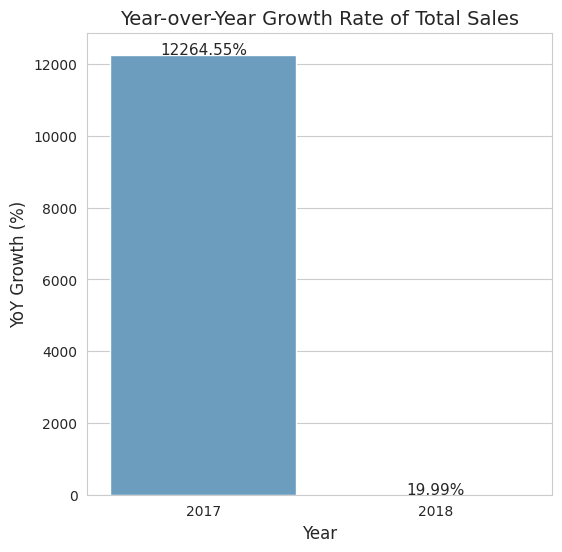

In [74]:
merged_orders = orders.merge(order_items, on='order_id', how='left')
merged_orders['order_purchase_timestamp'] = pd.to_datetime(merged_orders['order_purchase_timestamp'], errors='coerce')
merged_orders['year'] = merged_orders['order_purchase_timestamp'].dt.year
yearly_sales = merged_orders.groupby('year')['price'].sum().reset_index()
yearly_sales['YoY_Growth_%'] = yearly_sales['price'].pct_change() * 100
print(yearly_sales)

plot_data = yearly_sales[yearly_sales['year'] >= 2017]

plt.figure(figsize=(6,6))
ax = sns.barplot(x='year', y='YoY_Growth_%', data=plot_data, palette='Blues_d')
plt.title('Year-over-Year Growth Rate of Total Sales', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Growth (%)', fontsize=12)

for i, row in plot_data.iterrows():
    ax.text(row['year']-2017, row['YoY_Growth_%'] + 0.5, f"{row['YoY_Growth_%']:.2f}%", ha='center', fontsize=11)

plt.show()


**Top 3 customers who spent the most money in each year**

In [78]:
order_totals = order_items.groupby('order_id')['price'].sum().reset_index()
merged_data = orders.merge(order_totals, on='order_id', how='left')

merged_data['Year'] = pd.to_datetime(merged_data['order_purchase_timestamp']).dt.year

yearly_spending = (
    merged_data.groupby(['Year', 'customer_id'])['price']
    .sum()
    .reset_index()
)
yearly_spending.columns = ['Year', 'customer_id', 'total_spent']

top3_customers = (
    yearly_spending.groupby('Year')
    .apply(lambda x: x.nlargest(3, 'total_spent'))
    .reset_index(drop=True)
)

top3_customers = top3_customers.sort_values(by='Year', ascending=True).reset_index(drop=True)
top3_customers


/tmp/ipython-input-3345332359.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'total_spent'))


,Year,customer_id,total_spent
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1399.00
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1299.99
2,2016,4a06381959b6670756de02e07b83815f,1199.00
3,2017,1617b1357756262bfa56ab541c47bc16,13440.00
4,2017,c6e2731c5b391845f6800c97401a43a9,6735.00
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6499.00
6,2018,ec5b2ba62e574342386871631fafd3fc,7160.00
7,2018,f48d464a0baaea338cb25f816991ab1f,6729.00
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4599.90


**Retention rate of customers (within 6 months of first purchase)**

In [89]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
if 'first_purchase' in orders.columns:
    orders = orders.drop(columns=['first_purchase'])
first_purchase = orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase']
orders = orders.merge(first_purchase, on='customer_id', how='left')
repeat_purchases = orders[orders['order_purchase_timestamp'] > orders['first_purchase']].copy()
repeat_purchases['month_diff'] = ((repeat_purchases['order_purchase_timestamp'] - repeat_purchases['first_purchase']).dt.days // 30)
retained_customers = repeat_purchases[repeat_purchases['month_diff'] <= 6]['customer_id'].nunique()
total_customers = first_purchase['customer_id'].nunique()
retention_rate = round(retained_customers / total_customers * 100, 2)

print("Retention_rate:", retention_rate)
print("Total customers:", total_customers)
print("Repeat customers:", retained_customers)


Retention_rate: 0.0
Total customers: 99441
Repeat customers: 0
